In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import ast
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
def plot_commonest_feats(df, filename=False, save=False):
    traj_list = list(df['trajectory'])
    traj_list = [ast.literal_eval(pathway) for pathway in traj_list]
    counter = Counter(traj_list[0])
    for i in traj_list[1:]:
        counter.update(i)
    counter_df = pd.DataFrame.from_dict(counter, orient='index', columns=['frequency']).reset_index()
    plt.figure(figsize=(8, 8))
    sns.barplot(x='index', y='frequency', data=counter_df)
    plt.title('Frequency of features in pathways')
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel('Id', fontsize=12)
    plt.xticks(rotation='vertical')
    plt.tight_layout()
    if save:
        plt.savefig(f'pathways/commonest_{filename}.png')
    plt.show()
    plt.close()

In [76]:
def generate_filename(i):
    anemias = ['Hemolytic anemia', 'Anemia of chronic disease', 'Aplastic anemia', 'Iron deficiency anemia', 
               'Vitamin B12/Folate deficiency anemia', 'Thalassemia']
    anemia = anemias[i]
    filename = anemia.lower().replace(' ', '_').replace('/','_')
    return filename

#### Entire test_df

In [69]:
test_df = pd.read_csv('test_dfs/test_df_1.8e6.csv')
test_df.head()

,episode_length,index,is_success,reward,terminated,trajectory,y_actual,y_pred
0,5.0,0.0,1.0,5.0,0.0,"['mentzer_index', 'rbc', 'ret_count', 'mcv', '...",0.0,0.0
1,5.0,1.0,1.0,5.0,0.0,"['mentzer_index', 'rbc', 'ret_count', 'mcv', '...",0.0,0.0
2,4.0,2.0,1.0,4.0,0.0,"['mentzer_index', 'rbc', 'ret_count', 'Aplasti...",2.0,2.0
3,5.0,3.0,1.0,5.0,0.0,"['mentzer_index', 'rbc', 'ret_count', 'mcv', '...",0.0,0.0
4,5.0,4.0,1.0,5.0,0.0,"['mentzer_index', 'rbc', 'ret_count', 'mcv', '...",0.0,0.0


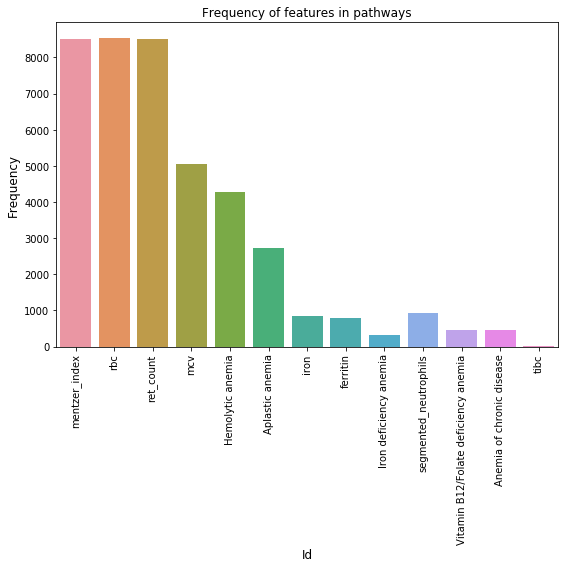

In [70]:
plot_commonest_feats(test_df, filename='test_df', save=True)

#### Success df

In [71]:
success_df = pd.read_csv('test_dfs/success_df_1.8e6.csv')

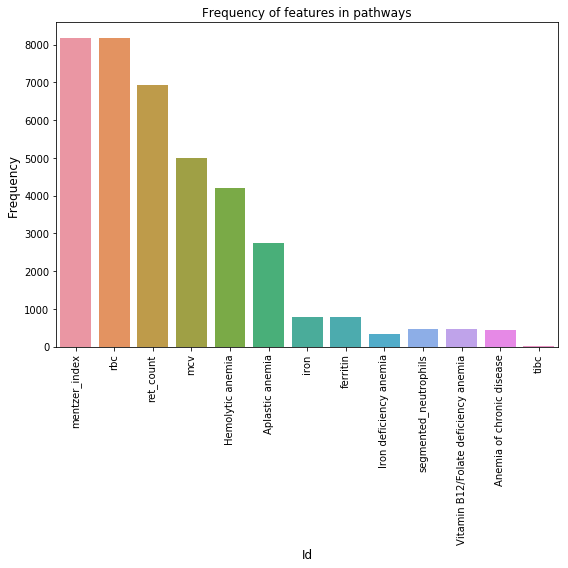

In [72]:
plot_commonest_feats(success_df, filename='success_df', save=True)

#### y_pred_df

In [73]:
y_pred_df = pd.read_csv('test_dfs/y_pred_df_1.8e6.csv')

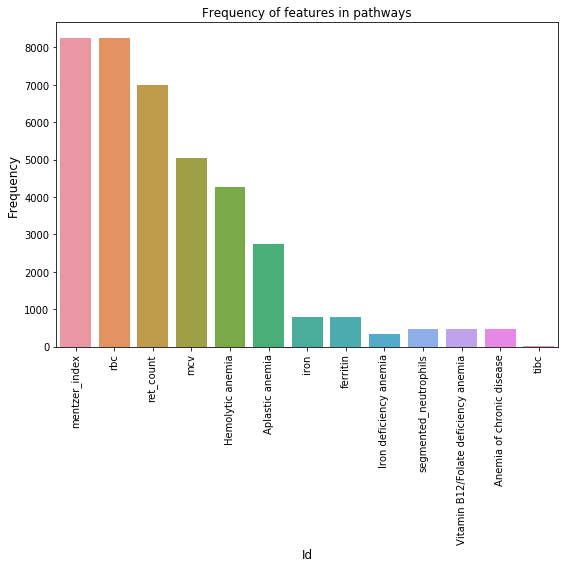

In [74]:
plot_commonest_feats(y_pred_df, filename='y_pred_df', save=True)

#### The anemias

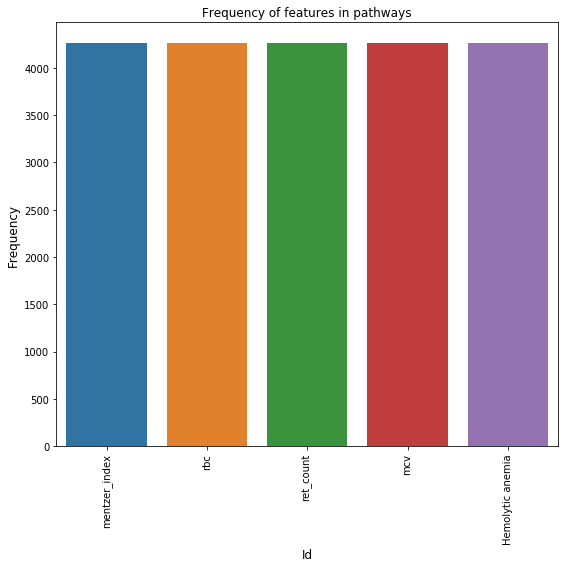

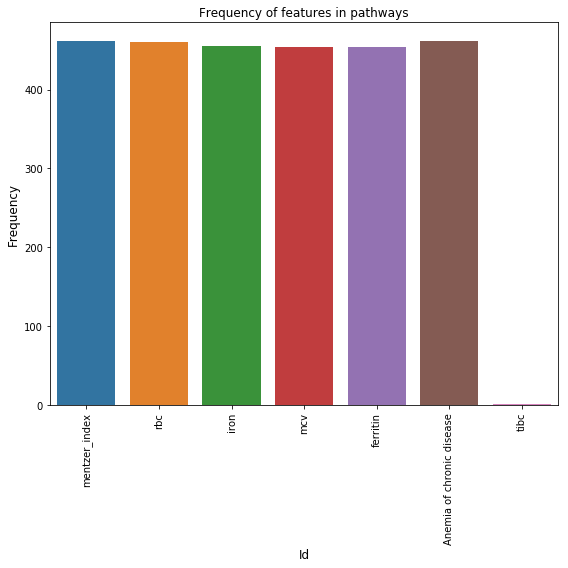

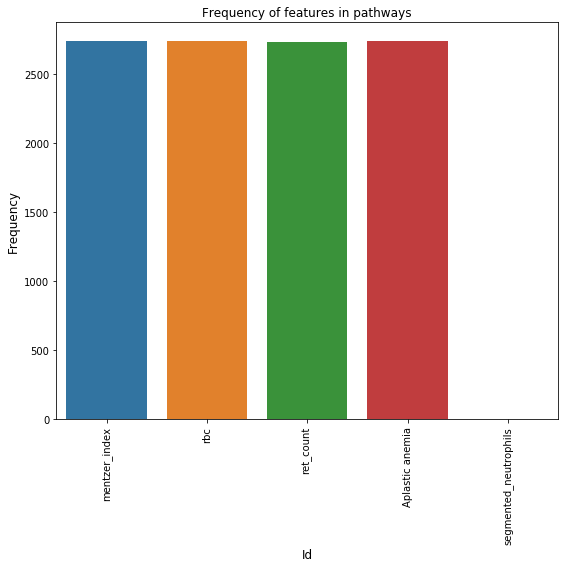

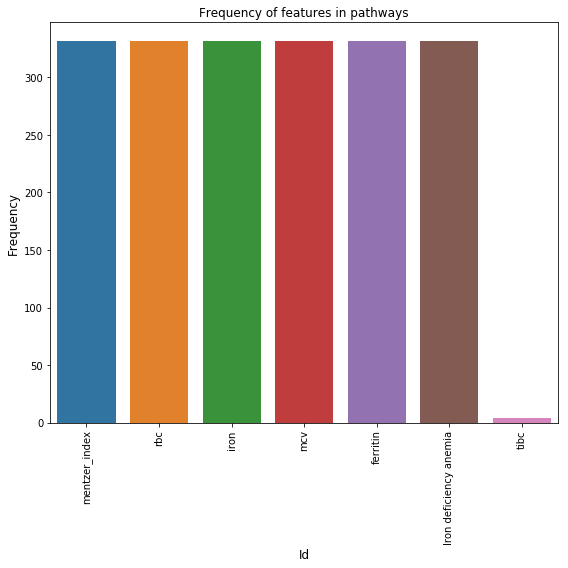

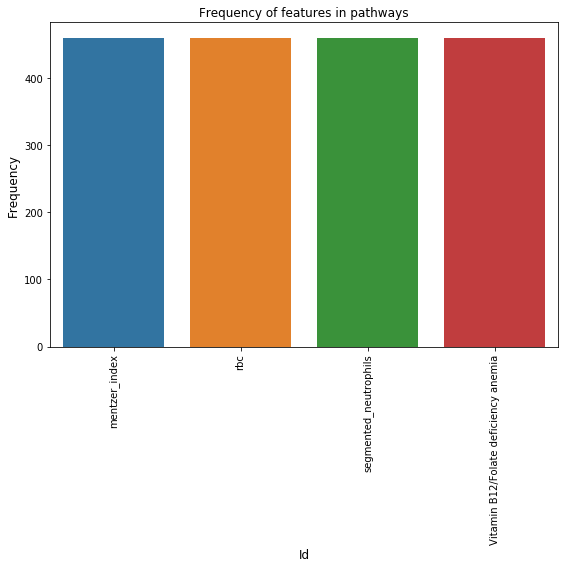

In [80]:
for i in range(6):
    anemia_df = test_df[test_df.y_pred==i]
    if len(anemia_df!=0):
        plot_commonest_feats(anemia_df, filename=generate_filename(i), save=True)